In [1]:
!pip install librosa
!pip install tensorflow

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
np.random.seed(42)

In [5]:
num_samples=1000
num_features=20
happy_data=np.random.normal(0,1,size=(num_samples,num_features))
sad_data=np.random.normal(2,1,size=(num_samples,num_features))

In [6]:
happy_labels=np.zeros(num_samples)
sad_labels=np.ones(num_samples)

In [7]:
X=np.concatenate([happy_data,sad_data],axis=0)
y=np.concatenate([happy_labels,sad_labels],axis=0)

In [8]:
y_onehot = to_categorical(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

**Building a simple neural network model**


In [10]:
model=models.Sequential([
    layers.Dense(256, activation='relu',input_shape=(num_features,)),
    layers.Dropout(0.5),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2,activation='softmax')  #(Two classes:happy&sad)
])

In [11]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

**Training**

In [12]:
history = model.fit(
    X_train,y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test,y_test)
)

Epoch 1/50
50/50 [==============================] - 3s 10ms/step - loss: 0.1522 - accuracy: 0.9319 - val_loss: 0.0165 - val_accuracy: 0.9975
Epoch 2/50
50/50 [==============================] - 0s 5ms/step - loss: 0.0147 - accuracy: 0.9981 - val_loss: 0.0086 - val_accuracy: 0.9975
Epoch 3/50
50/50 [==============================] - 0s 5ms/step - loss: 0.0068 - accuracy: 0.9987 - val_loss: 0.0068 - val_accuracy: 0.9975
Epoch 4/50
50/50 [==============================] - 0s 5ms/step - loss: 0.0061 - accuracy: 0.9981 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 5/50
50/50 [==============================] - 0s 5ms/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0050 - val_accuracy: 0.9975
Epoch 6/50
50/50 [==============================] - 0s 5ms/step - loss: 0.0040 - accuracy: 0.9994 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 7/50
50/50 [==============================] - 0s 6ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 0.9975
Epoch 8/50
50/50 [=

**Evaluating**

In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

13/13 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.9975
Test Loss: 0.0033, Test Accuracy: 0.9975


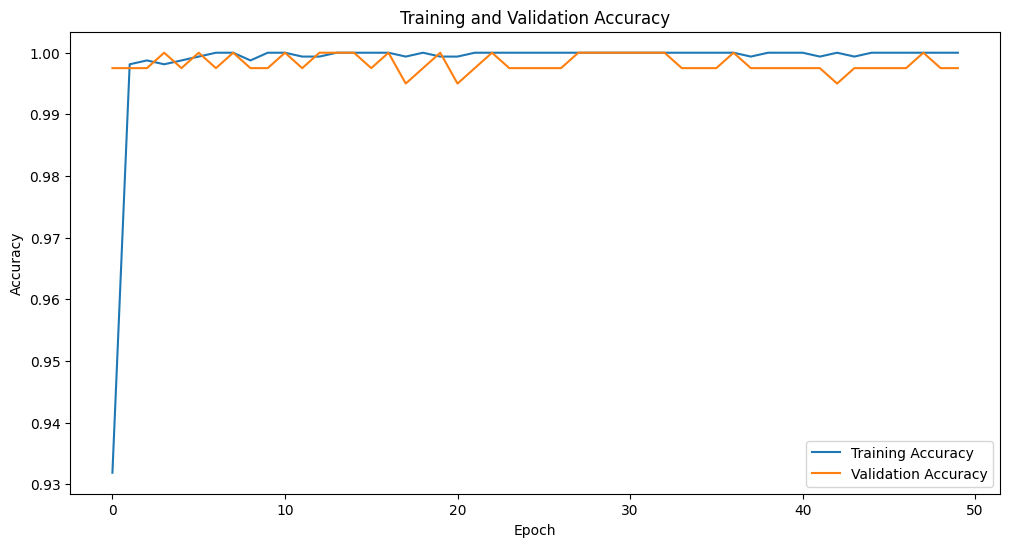

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
new_audio_sample = np.random.rand(1, num_features)
predicted_probabilities = model.predict(new_audio_sample)

predicted_class = np.argmax(predicted_probabilities)
emotion_mapping = {0: 'happy', 1: 'sad', 2: 'angry', 3: 'fear'}
predicted_emotion = emotion_mapping[predicted_class]

print('Predicted Emotion: ',predicted_emotion)


1/1 [==============================] - 0s 96ms/step
Predicted Emotion:  sad
